In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
train_data = pd.read_csv("processed/train_data_filled.csv")
test_data = pd.read_csv("processed/test_data_filled.csv")

In [3]:
x_train = train_data.drop('traffic_volume', axis=1)
y_train = train_data['traffic_volume']
x_test = test_data
all_data = pd.concat([x_train, x_test])

Handle time

In [4]:
all_data['timestamp'] = pd.to_datetime(all_data['timestamp'])
all_data['weekday'] = all_data['timestamp'].dt.weekday
all_data['month'] = all_data['timestamp'].dt.month
all_data['hour'] = all_data['timestamp'].dt.hour
all_data = all_data.drop(['timestamp'], axis=1)

x_train = all_data[:len(x_train)]
x_test = all_data[len(x_train):]

print(x_train.info())
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37696 entries, 0 to 37695
Data columns (total 10 columns):
holiday           37696 non-null object
temperature       37696 non-null float64
rain_in_hour      37696 non-null float64
snow_in_hour      37696 non-null float64
clouds_cover      37696 non-null int64
weather           37696 non-null object
weather_detail    37696 non-null object
weekday           37696 non-null int64
month             37696 non-null int64
hour              37696 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7949 entries, 0 to 7948
Data columns (total 10 columns):
holiday           7949 non-null object
temperature       7949 non-null float64
rain_in_hour      7949 non-null float64
snow_in_hour      7949 non-null float64
clouds_cover      7949 non-null int64
weather           7949 non-null object
weather_detail    7949 non-null object
weekday           7949 non-null int64
month

Head map

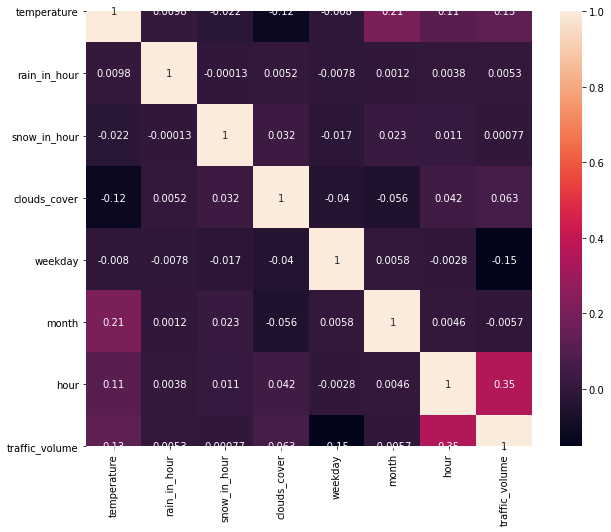

In [5]:
x_y_train = x_train.copy(deep=True)
x_y_train['traffic_volume'] = train_data['traffic_volume']

corr = x_y_train.corr()
#Correlation with output variable
corr_target = abs(corr["traffic_volume"])
top_corr_features = corr_target.index

plt.figure(figsize=(10,8))

#plot heat map
heatmap=sns.heatmap(x_y_train[top_corr_features].corr(), annot=True)

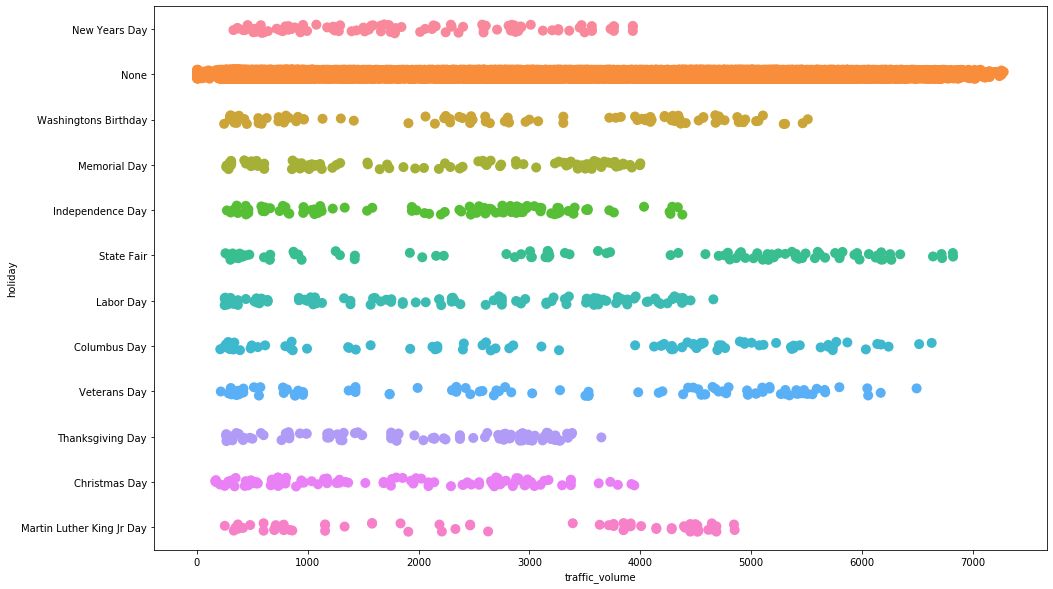

In [6]:
plt.figure(figsize=(16, 10))
holiday = sns.stripplot(x=y_train, y="holiday", data=x_train, size=10)

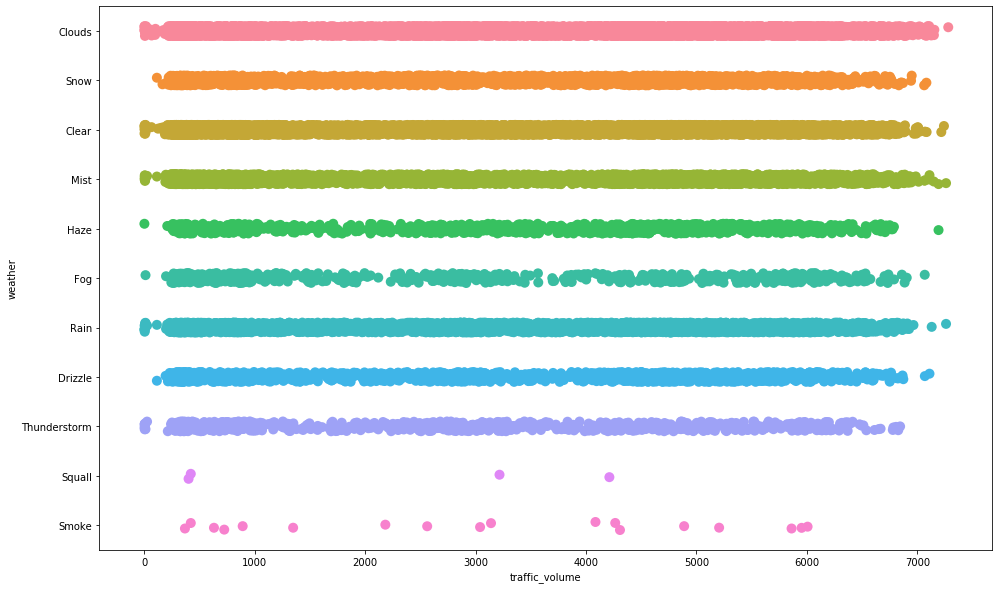

In [7]:
plt.figure(figsize=(16, 10))
weather = sns.stripplot(x=y_train, y="weather", data=x_train, size=10)

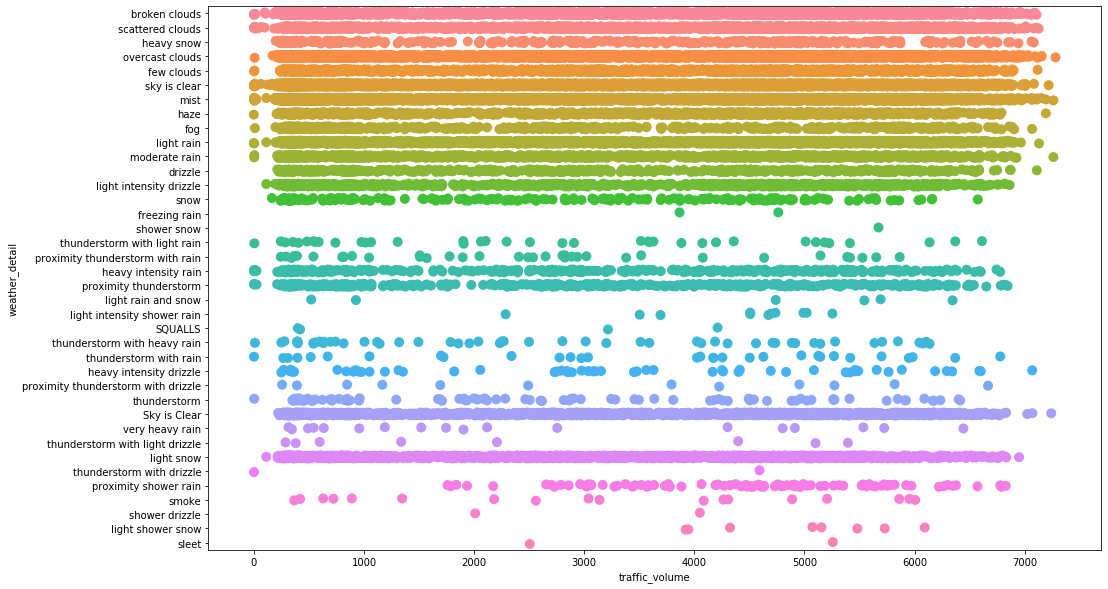

In [8]:
plt.figure(figsize=(16, 10))
weather_detail = sns.stripplot(x=y_train, y="weather_detail", data=x_train, size=10)

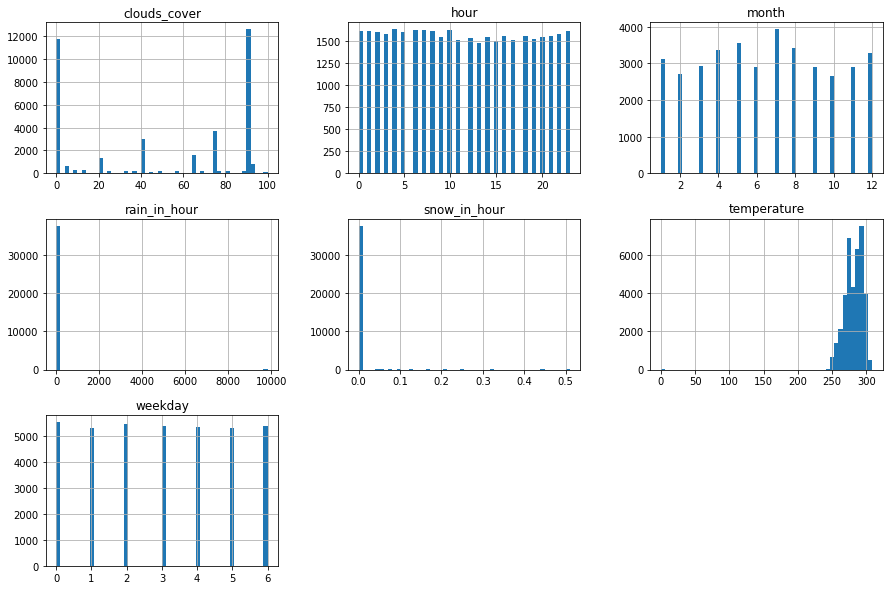

In [9]:
x_train.hist(bins=50, figsize=(15,10))
plt.show()

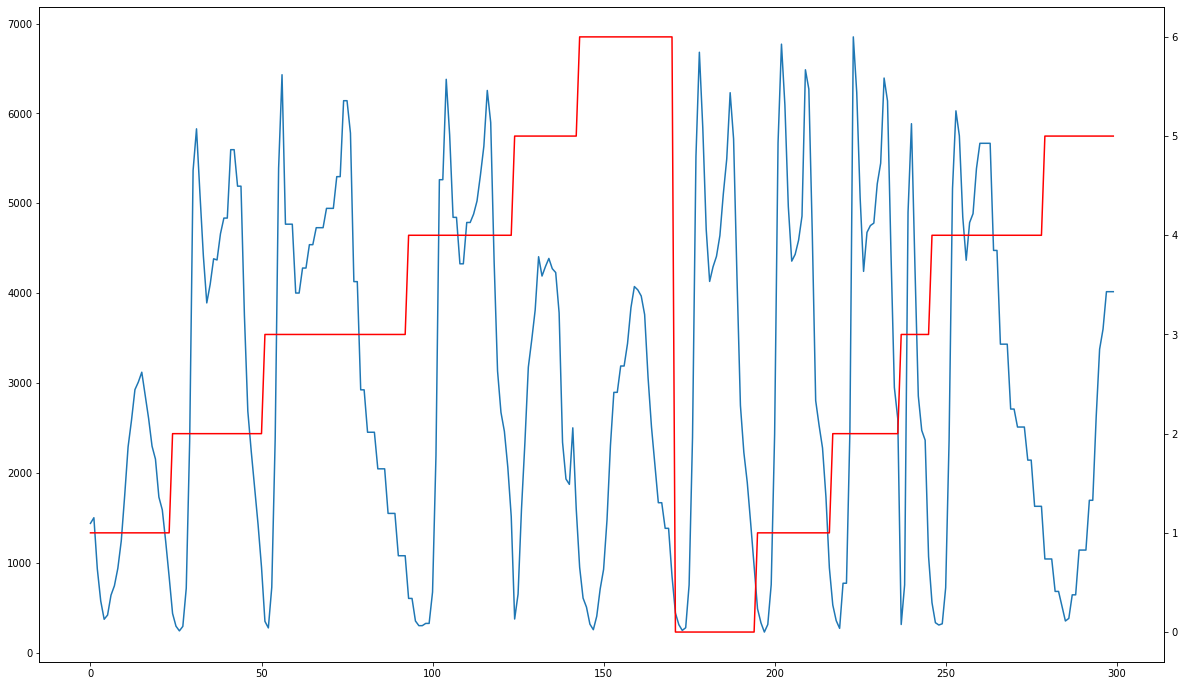

In [10]:
size_resolution = 300
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(x_train.weekday[0:size_resolution],'r')
ax1.plot(y_train[0:size_resolution])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(18.5, 10.5)

One-hot encoding

In [11]:
holiday_dummy = pd.get_dummies(all_data['holiday'])
weather_dummy = pd.get_dummies(all_data['weather'])
weather_detail_dummy = pd.get_dummies(all_data['weather_detail'])

all_data.drop('holiday', axis=1, inplace=True)
all_data.drop('weather', axis=1, inplace=True)
all_data.drop('weather_detail', axis=1, inplace=True)


In [12]:
scaler =  StandardScaler()
scaler.fit(all_data)
all_data = scaler.transform(all_data)

In [13]:
all_data = np.hstack((all_data, holiday_dummy, weather_dummy, weather_detail_dummy))

In [14]:
x_train = all_data[:len(x_train)]
x_test = all_data[len(x_train):]

PCA analysis

Text(0, 0.5, 'Cumulative explained variance ratio')

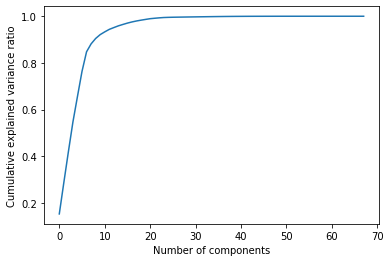

In [15]:
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')

In [16]:
# from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
# regressor = RandomForestRegressor()
regressor = XGBRegressor(n_estimators=600, max_depth=5)

In [17]:
scores = cross_val_score(regressor, x_train, y_train, scoring="neg_mean_absolute_error", cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:33:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:34:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:34:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:35:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:35:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:35:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
mae_scores = scores
# mae_scores = -scores
print("MAE ")
print("Scores:", mae_scores)
print("Mean:", mae_scores.mean())
print("Standard deviation:", mae_scores.std())

MAE 
Scores: [-314.12041458 -284.31286947 -307.16542931 -254.91094567 -275.75510635
 -244.05345589 -376.08225802 -276.18064923 -197.558578   -278.72342499]
Mean: -280.88631315175485
Standard deviation: 44.60621910481376


In [19]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(regressor, x_train, y_train, cv=10)

[21:36:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:36:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

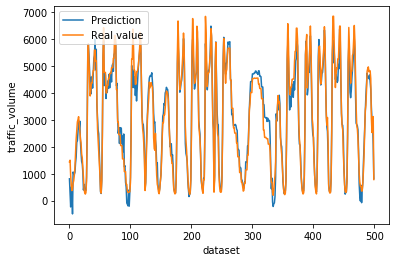

In [20]:
size_resolution = 500
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax2.plot( predictions[0:size_resolution],'r')
# ax1.plot(y_train[0:size_resolution],'-')
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.set_size_inches(18.5, 10.5)

plt.xlabel('dataset')
plt.ylabel('traffic_volume')
plt.plot(predictions[0:size_resolution], label='Prediction')
plt.plot(y_train[0:size_resolution], label='Real value')
plt.legend()
plt.show()


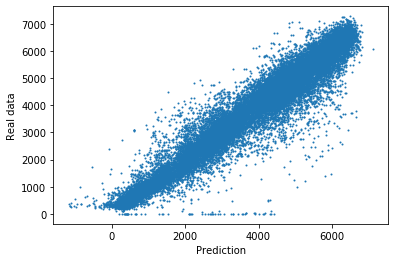

In [21]:
plt.xlabel('Prediction')
plt.ylabel('Real data')
plt.plot(predictions, y_train, 'o',markersize=1)

In [22]:
predictor = regressor.fit(x_train, y_train)
y_predict = predictor.predict(x_test)
np.savetxt('result.txt', y_predict, fmt='%d')


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:40:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
